# Pymaceuticals Inc. 
---

### Analysis

- My analysis

In [456]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Show a preview of the data
combined_data.tail()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [457]:
#Check the number of mice
combined_data["Mouse ID"].nunique()

249

In [458]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [459]:
# Display all data for the mouse with duplicate data
combined_data.loc[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [460]:
# Drop the mouse with duplicate data
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]

#Check new number of mice
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [461]:
summary =(
    clean_data.groupby(["Drug Regimen"])
    .agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
    .rename(columns = {"mean": "Mean", "median": "Median", "var": "Variance", "std": "Std Dev", "sem": "Std Error"})
)
summary.round(3)

Tumor Volume (mm3)                                   
                           Mean  Median Variance Std Dev Std Error
Drug Regimen                                                      
Capomulin                40.676  41.558   24.948   4.995     0.329
Ceftamin                 52.591  51.776   39.290   6.268     0.470
Infubinol                52.885  51.821   43.129   6.567     0.492
Ketapril                 55.236  53.699   68.554   8.280     0.604
Naftisol                 54.332  52.509   66.173   8.135     0.596
Placebo                  54.034  52.289   61.168   7.821     0.581
Propriva                 52.321  50.446   43.852   6.622     0.544
Ramicane                 40.217  40.673   23.487   4.846     0.321
Stelasyn                 54.233  52.432   59.451   7.710     0.573
Zoniferol                53.237  51.818   48.533   6.967     0.516

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

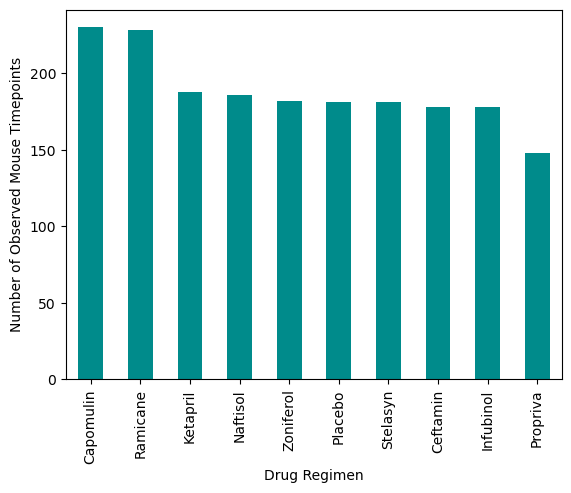

In [462]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
group_size = clean_data.groupby("Drug Regimen").size().sort_values(ascending = False)
group_size.plot.bar(xlabel="Drug Regimen", ylabel = "Number of Observed Mouse Timepoints", color = "darkcyan")

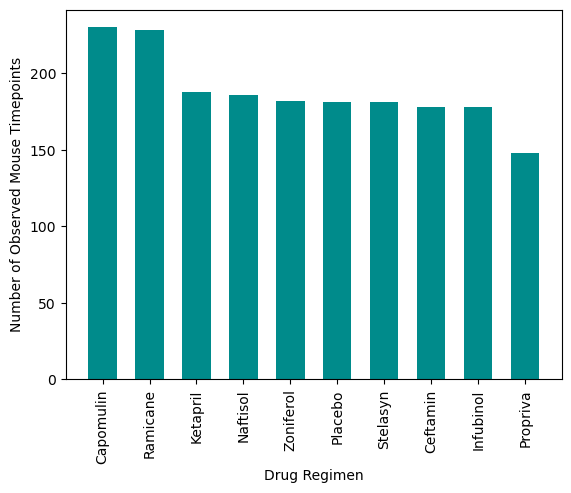

In [463]:
# Generate the same plot using pyplot
plt.bar(group_size.index, group_size, color = "darkcyan", width = 0.6)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()



<Axes: ylabel='Sex'>

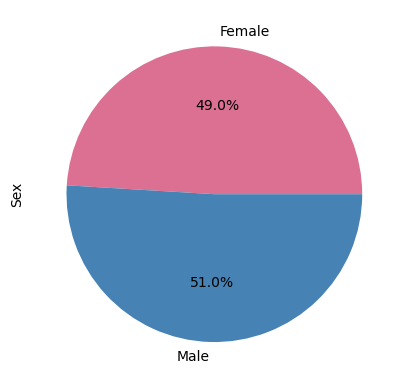

In [464]:
# Generate a pie chart showing the distribution of female versus male mice using Pandas

genders = clean_data.groupby("Sex").size()
genders.plot.pie(ylabel="Sex", autopct='%1.1f%%', colors = ["palevioletred", "steelblue"])

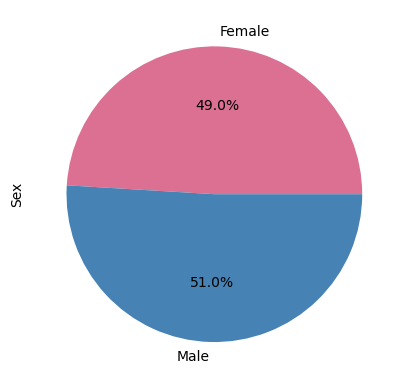

In [465]:
# Generate the same pie plot using pyplot
labels = ["Female", "Male"]
colors = ["palevioletred", "steelblue"]
plt.pie(genders, labels = labels, colors = colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


In [466]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


last_timepoint = clean_data.loc[clean_data.groupby("Mouse ID")["Timepoint"].idxmax()].reset_index(drop = True)
final_tumor = last_timepoint[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]].sort_values(["Drug Regimen"]).set_index("Mouse ID")
final_tumor





,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
g316,Capomulin,40.159220
s710,Capomulin,40.728578
t565,Capomulin,34.455298
r944,Capomulin,41.581521
r554,Capomulin,32.377357
...,...,...
w575,Zoniferol,68.401286
c302,Zoniferol,64.575222
c264,Zoniferol,67.942121


In [467]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data = []

for x in treatments:
    ft = final_tumor.loc[final_tumor["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    tumor_data.append(ft)

    # Calculate quartiles and iqr for each treatment
    quartiles = np.quantile(ft, [.25, .5, .75])
    lowerq = quartiles[0]
    upperq = quartiles[2]
    iqr = upperq-lowerq
    # Find upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = ft.loc[(ft < lower_bound) | (ft > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}")





Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/s0/czz4mn113571lpx71mt26m2c0000gn/T/ipykernel_4270/3894646005.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatments)


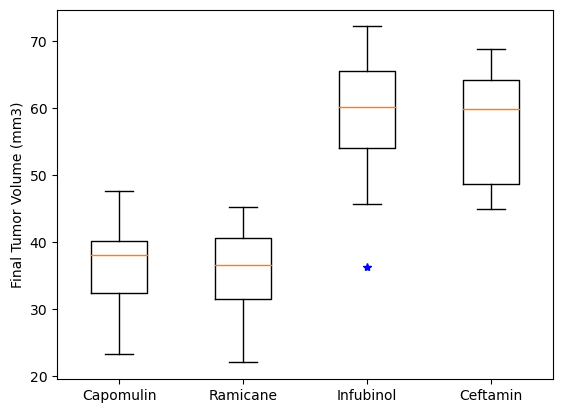

In [468]:
# Print box plots for each drug regimen of interest
fig, ax = plt.subplots()
ax.set_xticklabels(treatments)
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(tumor_data, 0, "b*")
plt.show()

## Line and Scatter Plot

<Axes: title={'center': 'Capomulin Treatment of Mouse 364'}, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)'>

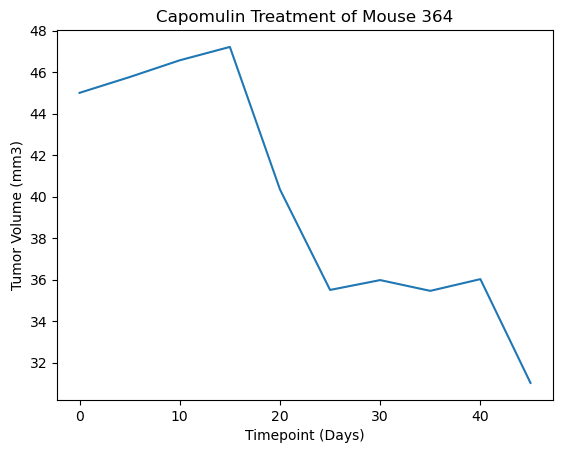

In [469]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"]== "Capomulin"]
mouse_u364= clean_data.loc[clean_data["Mouse ID"] == "u364"]
mouse_u364.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)", xlabel = "Timepoint (Days)", 
                    ylabel = "Tumor Volume (mm3)", legend = None, title = "Capomulin Treatment of Mouse 364")

In [470]:
average_tumor=capomulin.groupby("Mouse ID").mean("Tumor Volume")



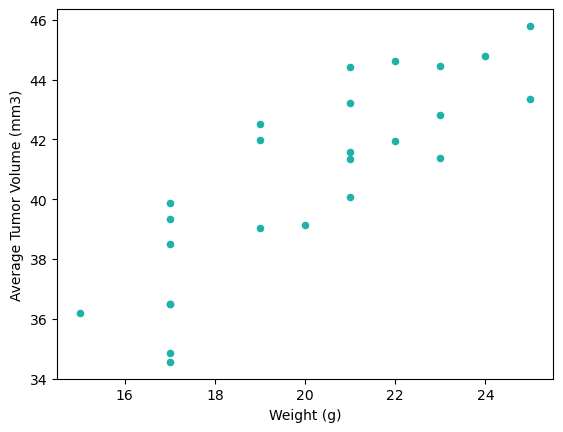

In [471]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_plot = average_tumor.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", ylabel = "Average Tumor Volume (mm3)", color = "lightseagreen")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


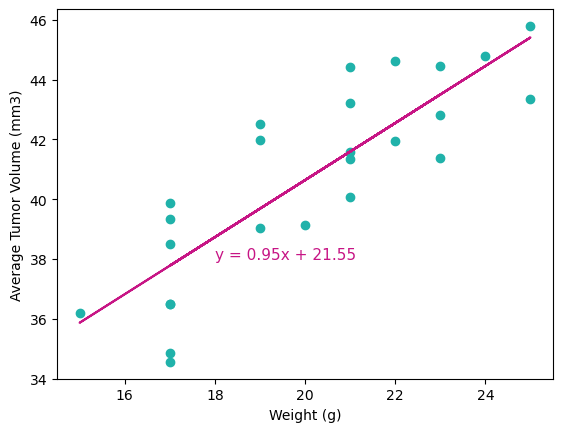

In [472]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = average_tumor.corr(method="pearson")
weight_correlation = correlation["Weight (g)"]["Tumor Volume (mm3)"]

# correlation.loc[correlation["Tumor Volume (mm3)", "Weight (g)"]]
print(f"The correlation between mouse weight and average tumor volume is {round(weight_correlation,2)}.")
x_values = average_tumor["Weight (g)"]
y_values = average_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values, color ="lightseagreen")
plt.plot(x_values, regress_values, color = "mediumvioletred")
plt.annotate(line_eq,(18, 38),fontsize=11, color="mediumvioletred")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show(close = None, block= None)

